# EDA - Emotional monitoring & Stress patterns dataset

Perform a comprehensive exploratory data analysis of the Emotional Monitoring dataset to:
- Understand physicological and emotional monitoring data structure
- Analyze relationships between physicological signals (EEG, heart rate, cortisol) and emotional states
- Identify patterns in engagement leves and cognitive states
- Detect missing values and outliers
- Prepare the dataset for feature engineering and modeling

## Dataset

**File:** `02_emotional_monitoring_dataset_with_target.csv`  
**Source:** Emotional Monitoring Dataset  
**Key Variables:** HeartRate, EEG, CortisolLevel, EmotionalState, CognitiveState, EngagementLevel



## Imports and settings

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
from scipy import stats
from scipy.stats import f_oneway

In [3]:
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Visualization style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

# Path configuration
BASE_DIR = Path.cwd().parent if Path.cwd().name == 'notebooks' else Path.cwd()
RAW_DATA_DIR = BASE_DIR / 'datasets' / 'raw'
PROCESSED_DATA_DIR = BASE_DIR / 'datasets' / 'processed'

# Create processed directory if it doesn't exist
PROCESSED_DATA_DIR.mkdir(parents=True, exist_ok=True)
print ("Configuration complete")

Configuration complete


## 1. Data loading
load the dataset and perform an init inspection of its structure

In [5]:
df = pd.read_csv(RAW_DATA_DIR / '02_emotional_monitoring_dataset_with_target.csv')
df

,HeartRate,SkinConductance,EEG,Temperature,PupilDiameter,SmileIntensity,FrownIntensity,CortisolLevel,ActivityLevel,AmbientNoiseLevel,LightingLevel,EmotionalState,CognitiveState,EngagementLevel
0,61,8.937204,11.794946,36.501723,3.330181,0.689238,0.189024,0.603035,136,59,394,engaged,distracted,3
1,60,12.635397,19.151412,36.618910,3.428995,0.561056,0.091367,0.566671,155,39,479,engaged,distracted,1
2,81,3.660028,6.226098,36.176898,2.819286,0.417951,0.227355,1.422475,55,30,832,partially engaged,focused,3
3,119,0.563070,4.542968,37.205293,2.192961,0.140186,0.502965,1.669045,39,40,602,disengaged,focused,3
4,118,0.477378,0.996209,37.248118,2.450139,0.064471,0.695604,1.854076,10,42,908,disengaged,focused,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,98,3.897648,7.681519,36.274526,2.624275,0.404309,0.204719,1.215872,65,50,913,partially engaged,distracted,2
996,109,0.439062,0.352790,37.173929,2.489483,0.070776,0.638161,1.826544,23,43,642,disengaged,distracted,2
997,108,1.077287,1.836462,37.073454,2.370298,0.011001,0.595518,1.781096,8,43,620,disengaged,distracted,2
998,76,14.260010,19.309704,36.708047,3.393744,0.653693,0.171151,0.783958,110,38,779,engaged,distracted,1


## 2. General Information and data analysis

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   HeartRate          1000 non-null   int64  
 1   SkinConductance    1000 non-null   float64
 2   EEG                1000 non-null   float64
 3   Temperature        1000 non-null   float64
 4   PupilDiameter      1000 non-null   float64
 5   SmileIntensity     1000 non-null   float64
 6   FrownIntensity     1000 non-null   float64
 7   CortisolLevel      1000 non-null   float64
 8   ActivityLevel      1000 non-null   int64  
 9   AmbientNoiseLevel  1000 non-null   int64  
 10  LightingLevel      1000 non-null   int64  
 11  EmotionalState     1000 non-null   object 
 12  CognitiveState     1000 non-null   object 
 13  EngagementLevel    1000 non-null   int64  
dtypes: float64(7), int64(5), object(2)
memory usage: 109.5+ KB


In [10]:
print(df.dtypes)


HeartRate              int64
SkinConductance      float64
EEG                  float64
Temperature          float64
PupilDiameter        float64
SmileIntensity       float64
FrownIntensity       float64
CortisolLevel        float64
ActivityLevel          int64
AmbientNoiseLevel      int64
LightingLevel          int64
EmotionalState        object
CognitiveState        object
EngagementLevel        int64
dtype: object


In [12]:
# Missing values
df.isnull().any()

HeartRate            False
SkinConductance      False
EEG                  False
Temperature          False
PupilDiameter        False
SmileIntensity       False
FrownIntensity       False
CortisolLevel        False
ActivityLevel        False
AmbientNoiseLevel    False
LightingLevel        False
EmotionalState       False
CognitiveState       False
EngagementLevel      False
dtype: bool

In [14]:
# find duplicate data
df.duplicated().sum()

np.int64(0)

## 3. Descriptive Statistics

### 3.1 Numerical statistics analysis

In [15]:
numeric_features = df.select_dtypes(include=[np.number]).columns
numeric_features

Index(['HeartRate', 'SkinConductance', 'EEG', 'Temperature', 'PupilDiameter',
       'SmileIntensity', 'FrownIntensity', 'CortisolLevel', 'ActivityLevel',
       'AmbientNoiseLevel', 'LightingLevel', 'EngagementLevel'],
      dtype='object')

In [17]:

desc_stats = df[numeric_features].describe()
print("Numerical Statistics:")
print(desc_stats)
additional_stats = pd.DataFrame({
    'Mean': df[numeric_features].mean(),
    'Median': df[numeric_features].median(),
    'Std': df[numeric_features].std(),
    'Min': df[numeric_features].min(),
    'Max': df[numeric_features].max(),
    'Skewness': df[numeric_features].skew(),
    'Range': df[numeric_features].max() - df[numeric_features].min(),
    'Variance': df[numeric_features].var(),
    'Sum': df[numeric_features].sum(),
    'Count': df[numeric_features].count(),
    })
print("\nAdditional Statistics:")
print(additional_stats)


Numerical Statistics:
         HeartRate  SkinConductance          EEG  Temperature  PupilDiameter  \
count  1000.000000      1000.000000  1000.000000  1000.000000    1000.000000   
mean     89.428000         4.886971     8.493616    36.745107       2.833396   
std      17.339651         4.187668     5.616052     0.435840       0.535909   
min      60.000000         0.008741     0.019809    36.000958       2.000573   
25%      75.000000         1.602463     3.993575    36.370811       2.398951   
50%      89.000000         3.413038     7.400188    36.743273       2.747615   
75%     105.000000         7.719411    13.004892    37.115120       3.228348   
max     119.000000        14.998714    19.987929    37.498955       3.996728   

       SmileIntensity  FrownIntensity  CortisolLevel  ActivityLevel  \
count     1000.000000     1000.000000    1000.000000    1000.000000   
mean         0.422318        0.348089       1.242361      83.349000   
std          0.282820        0.236208       

### 3. Categorial variables

In [18]:
categorical_features = df.select_dtypes(include=['object']).columns
categorical_features

Index(['EmotionalState', 'CognitiveState'], dtype='object')

In [21]:
for col in categorical_features:
    print(f"\n{'='*60}")
    print(f"{col}")
    print(f"{'='*60}")
    value_counts = df[col].value_counts()
    value_counts_pct = df[col].value_counts(normalize=True) * 100

    summary = pd.DataFrame({
        'Category': value_counts.index,
        'Count': value_counts.values,
        'Percentage': value_counts_pct.values
    })
    print(summary)



EmotionalState
            Category  Count  Percentage
0  partially engaged    347        34.7
1            engaged    332        33.2
2         disengaged    321        32.1

CognitiveState
     Category  Count  Percentage
0  distracted    528        52.8
1     focused    472        47.2


## 4. Visualizations - Distributions
visualize the distributions of key physicological and emotional variables.

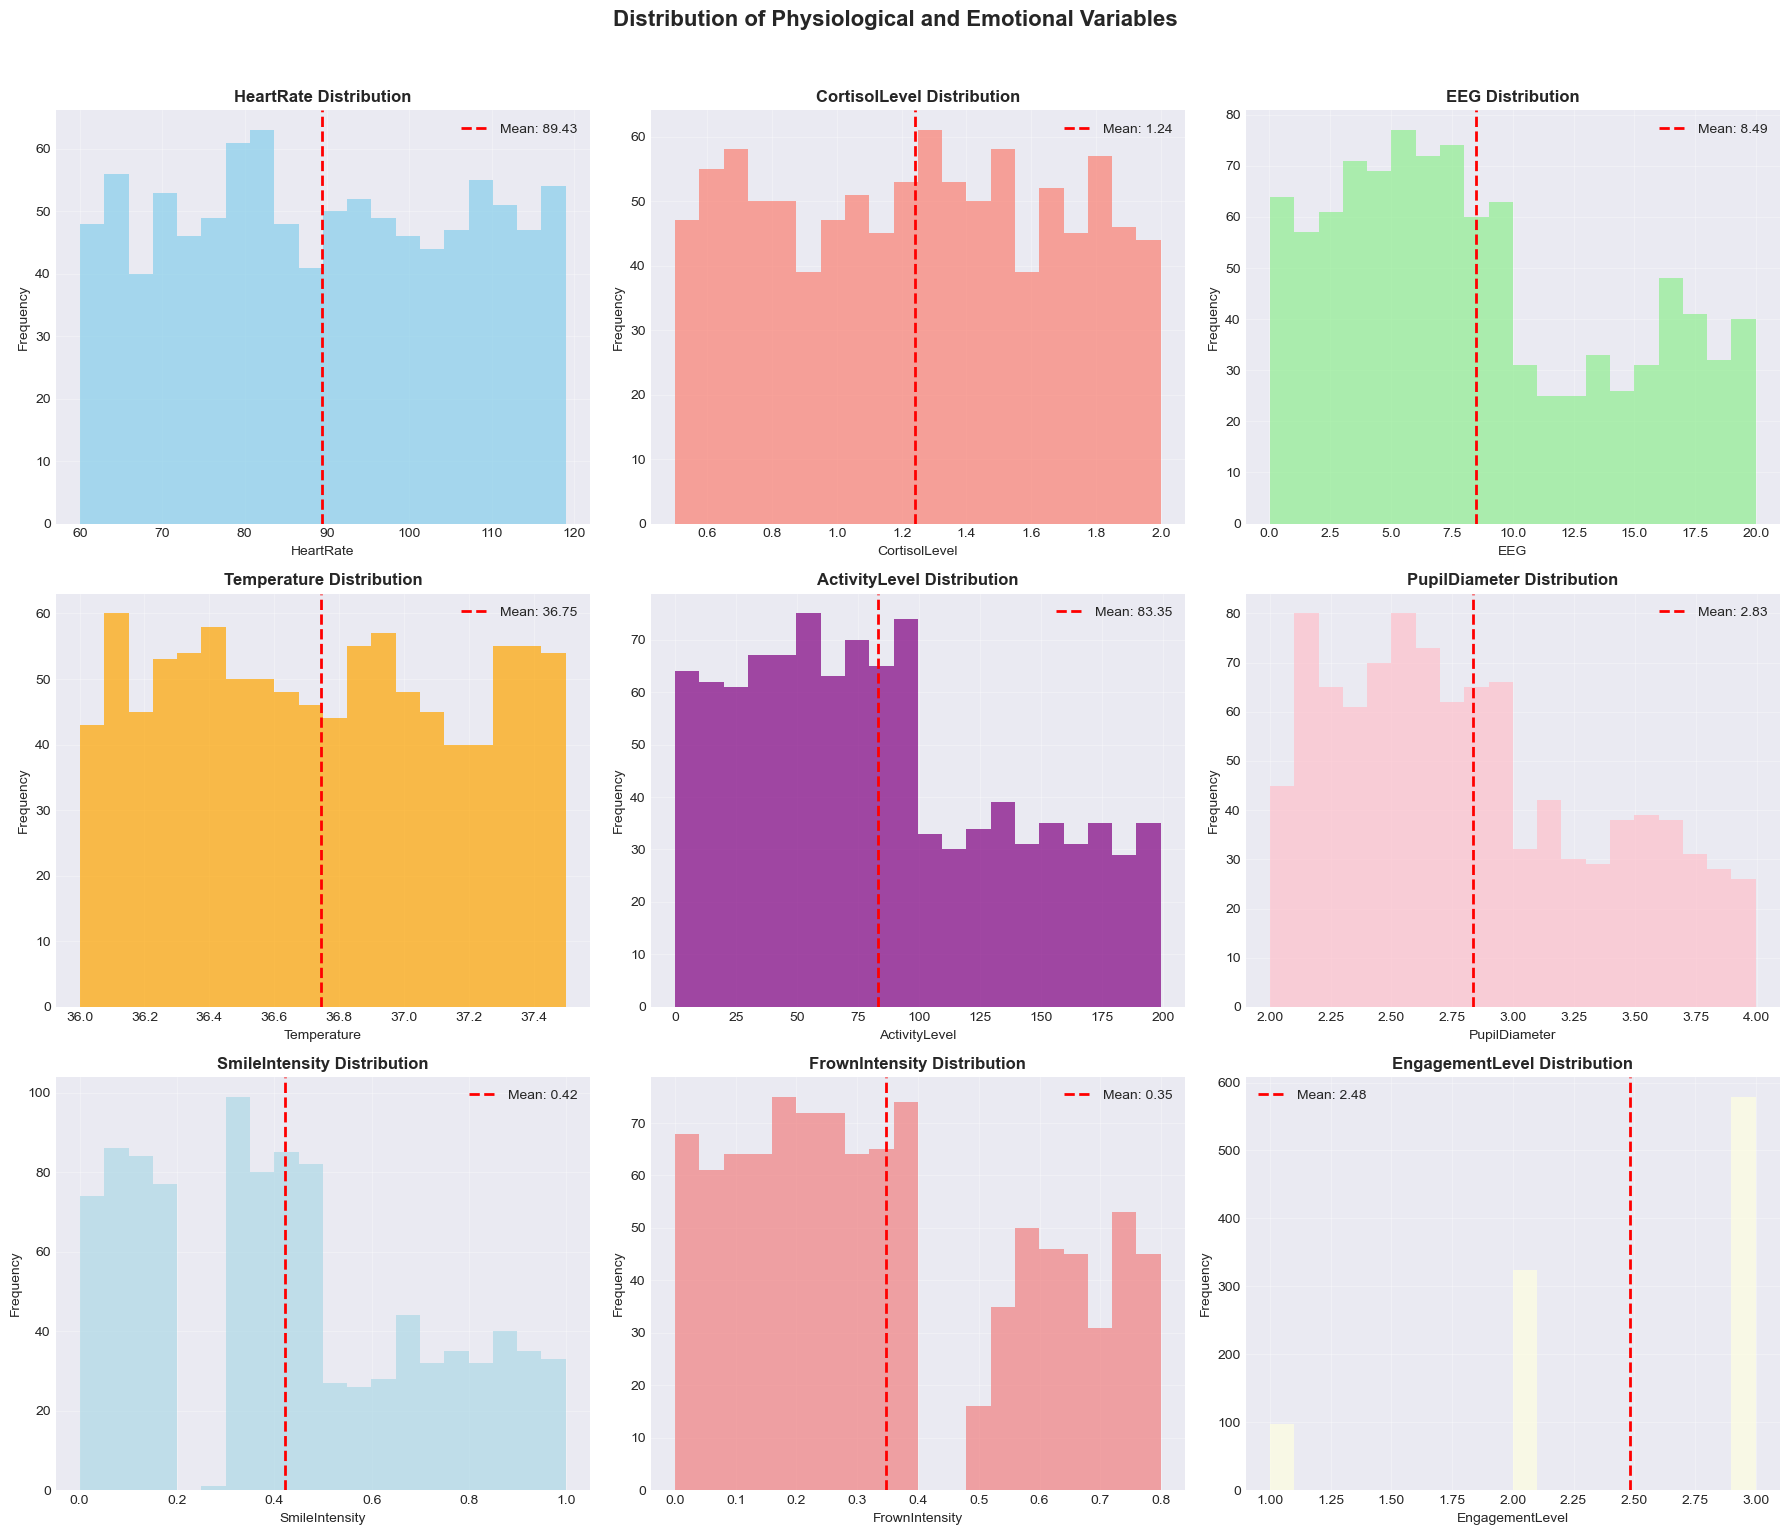

In [22]:
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
fig.suptitle("Distribution of Physiological and Emotional Variables", fontsize=16, fontweight='bold', y=1.02)

features = [
    ('HeartRate', 0, 0, 'skyblue'),
    ('CortisolLevel', 0, 1, 'salmon'),
    ('EEG', 0, 2, 'lightgreen'),
    ('Temperature', 1, 0, 'orange'),
    ('ActivityLevel', 1, 1, 'purple'),
    ('PupilDiameter', 1, 2, 'pink'),
    ('SmileIntensity', 2, 0, 'lightblue'),
    ('FrownIntensity', 2, 1, 'lightcoral'),
    ('EngagementLevel', 2, 2, 'lightyellow')
]

for var_name, row, col, color in features:
    if var_name in df.columns:
        axes[row, col].hist(df[var_name].dropna(), bins=20, color=color, alpha=0.7)
        mean_val = df[var_name].mean()
        axes[row, col].axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
        axes[row, col].set_title(f'{var_name} Distribution', fontweight='bold')
        axes[row, col].set_xlabel(var_name)
        axes[row, col].set_ylabel('Frequency')
        axes[row, col].legend()
        axes[row, col].grid(True, alpha=0.3)
    else: 
        axes[row, col].axis('off')

plt.tight_layout()
plt.savefig(PROCESSED_DATA_DIR / '02_emotional_monitoring_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

        

## 5. Relationships Analysis

Explore correlations between physiological signals and emotional/cognitive states.

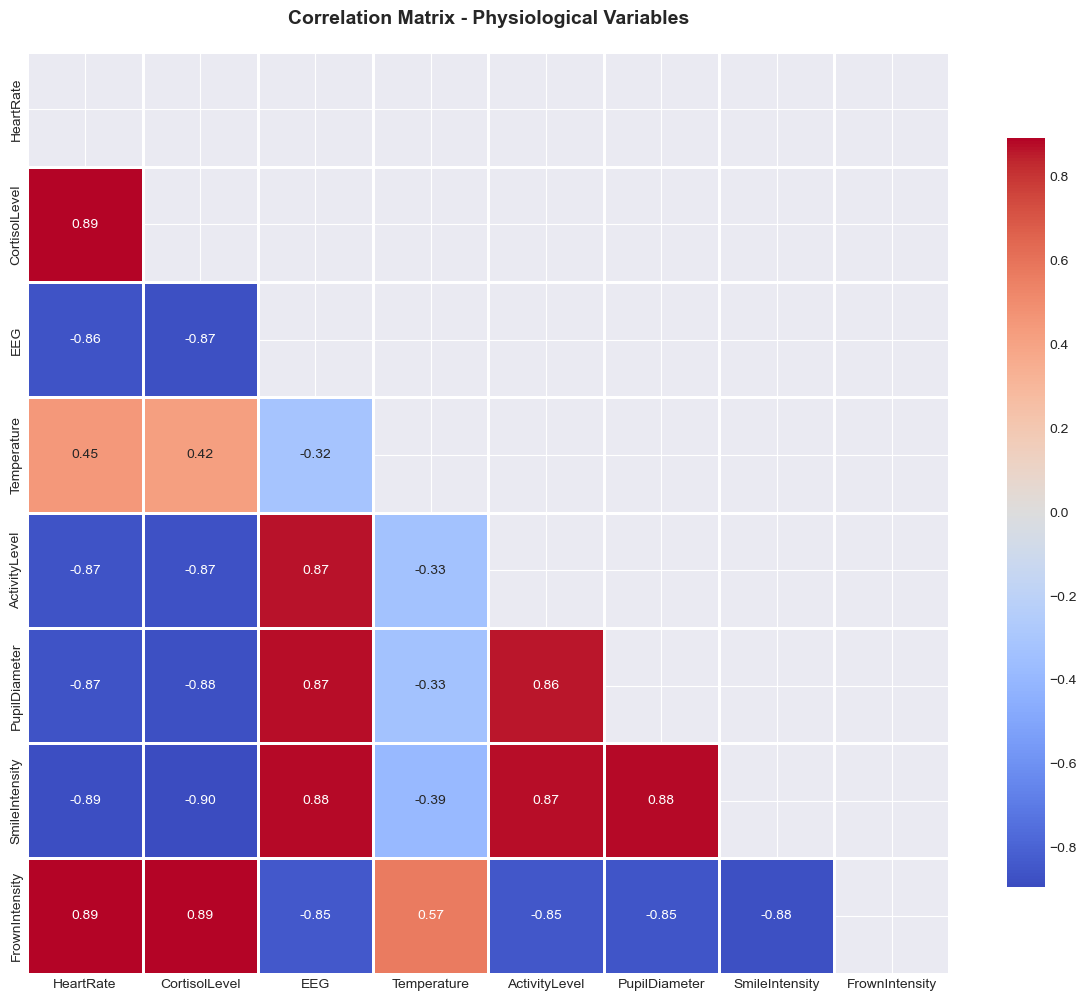

    Variable 1     Variable 2  Correlation
 CortisolLevel SmileIntensity    -0.895058
     HeartRate  CortisolLevel     0.891824
     HeartRate SmileIntensity    -0.888055
 CortisolLevel FrownIntensity     0.887497
     HeartRate FrownIntensity     0.886961
 PupilDiameter SmileIntensity     0.880923
           EEG SmileIntensity     0.880789
SmileIntensity FrownIntensity    -0.878329
 CortisolLevel  PupilDiameter    -0.876244
 CortisolLevel            EEG    -0.874679
 ActivityLevel SmileIntensity     0.873936
           EEG  PupilDiameter     0.873858
 CortisolLevel  ActivityLevel    -0.872264
           EEG  ActivityLevel     0.870659
     HeartRate  ActivityLevel    -0.867075
     HeartRate  PupilDiameter    -0.865648
     HeartRate            EEG    -0.863343
 ActivityLevel  PupilDiameter     0.861440
 PupilDiameter FrownIntensity    -0.854949
 ActivityLevel FrownIntensity    -0.848265
           EEG FrownIntensity    -0.845877
   Temperature FrownIntensity     0.566185
     HeartR

In [23]:
features = ['HeartRate', 'CortisolLevel', 'EEG', 'Temperature', 'ActivityLevel', 
            'PupilDiameter', 'SmileIntensity', 'FrownIntensity']

features = [ f for f in features if f in df.columns]

if len(features) > 1:
    corr_matrix = df[features].corr()
    plt.figure(figsize=(12, 10))
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    sns.heatmap(corr_matrix, 
                mask=mask,
                annot=True, 
                fmt='.2f', 
                cmap='coolwarm', 
                center=0,
                square=True,
                linewidths=1,
                cbar_kws={"shrink": 0.8})
    plt.title('Correlation Matrix - Physiological Variables', fontsize=14, fontweight='bold', pad=20)
    plt.tight_layout()
    plt.savefig(PROCESSED_DATA_DIR / '02_emotional_monitoring_correlation.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    corr_pairs = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            corr_val = corr_matrix.iloc[i, j]
            if abs(corr_val) > 0.3:
                corr_pairs.append({
                    'Variable 1': corr_matrix.columns[i],
                    'Variable 2': corr_matrix.columns[j],
                    'Correlation': corr_val
                })
    
    if corr_pairs:
        corr_df = pd.DataFrame(corr_pairs).sort_values('Correlation', key=abs, ascending=False)
        print(corr_df.to_string(index=False))
    else:
        print("No strong correlations found (|r| > 0.3)")


## 6. Analysis by Emotional and cognitive states

Analyze how physiological variables vary across different emotional states, cognitive states, and engagment levels.

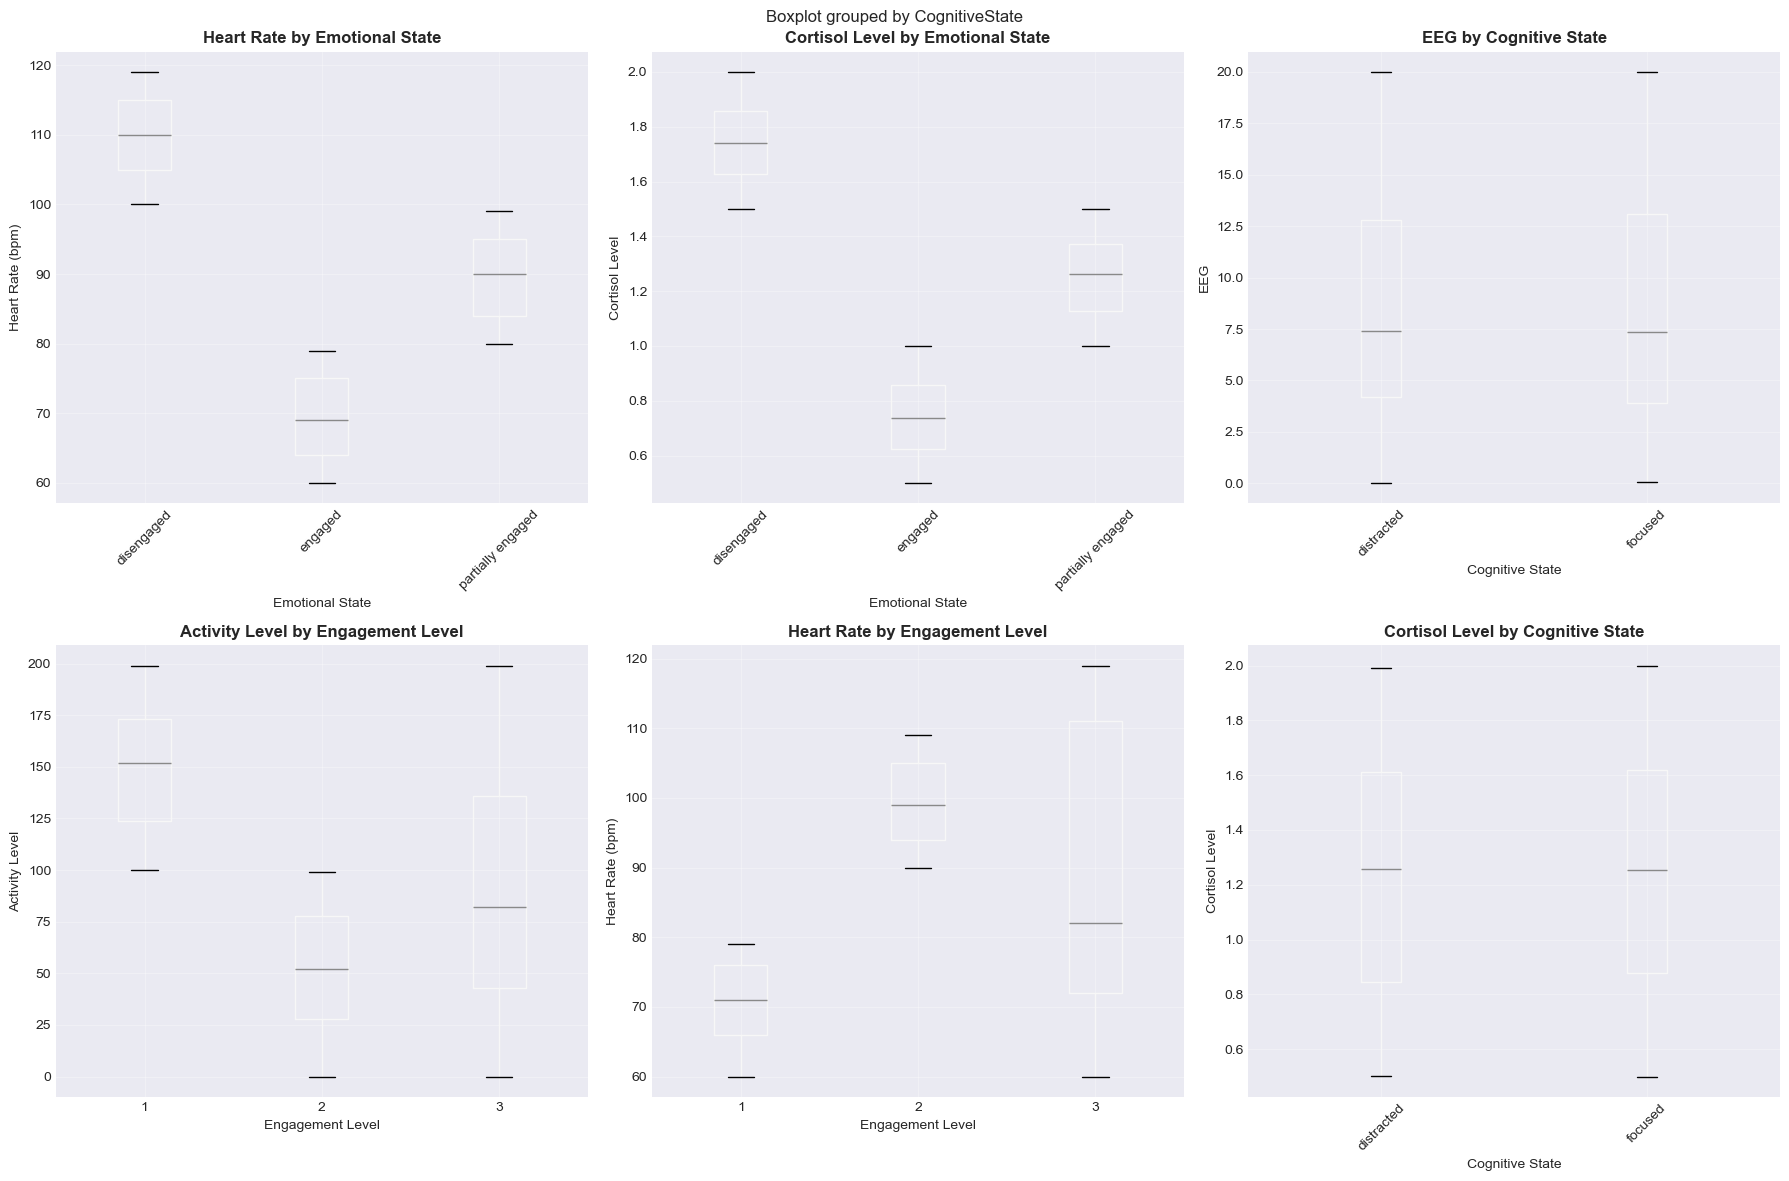

STATISTICS BY CATEGORIES

Heart Rate by Emotional State:
                     mean   std  count
EmotionalState                        
disengaged         109.98  5.58    321
engaged             69.61  5.96    332
partially engaged   89.38  6.06    347

Activity Level by Engagement Level:
                   mean    std  count
EngagementLevel                      
1                149.52  29.58     97
2                 51.35  29.48    324
3                 90.17  56.50    579


In [24]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Physiological Variables by Emotional/Cognitive States', fontsize=16, fontweight='bold', y=1.02)

# 1. Heart Rate by Emotional State
if 'EmotionalState' in df.columns and 'HeartRate' in df.columns:
    df.boxplot(column='HeartRate', by='EmotionalState', ax=axes[0, 0])
    axes[0, 0].set_title('Heart Rate by Emotional State', fontweight='bold')
    axes[0, 0].set_xlabel('Emotional State')
    axes[0, 0].set_ylabel('Heart Rate (bpm)')
    axes[0, 0].tick_params(axis='x', rotation=45)
    axes[0, 0].grid(True, alpha=0.3)

# 2. Cortisol Level by Emotional State
if 'EmotionalState' in df.columns and 'CortisolLevel' in df.columns:
    df.boxplot(column='CortisolLevel', by='EmotionalState', ax=axes[0, 1])
    axes[0, 1].set_title('Cortisol Level by Emotional State', fontweight='bold')
    axes[0, 1].set_xlabel('Emotional State')
    axes[0, 1].set_ylabel('Cortisol Level')
    axes[0, 1].tick_params(axis='x', rotation=45)
    axes[0, 1].grid(True, alpha=0.3)

# 3. EEG by Cognitive State
if 'CognitiveState' in df.columns and 'EEG' in df.columns:
    df.boxplot(column='EEG', by='CognitiveState', ax=axes[0, 2])
    axes[0, 2].set_title('EEG by Cognitive State', fontweight='bold')
    axes[0, 2].set_xlabel('Cognitive State')
    axes[0, 2].set_ylabel('EEG')
    axes[0, 2].tick_params(axis='x', rotation=45)
    axes[0, 2].grid(True, alpha=0.3)

# 4. Activity Level by Engagement Level
if 'EngagementLevel' in df.columns and 'ActivityLevel' in df.columns:
    df.boxplot(column='ActivityLevel', by='EngagementLevel', ax=axes[1, 0])
    axes[1, 0].set_title('Activity Level by Engagement Level', fontweight='bold')
    axes[1, 0].set_xlabel('Engagement Level')
    axes[1, 0].set_ylabel('Activity Level')
    axes[1, 0].grid(True, alpha=0.3)

# 5. Heart Rate by Engagement Level
if 'EngagementLevel' in df.columns and 'HeartRate' in df.columns:
    df.boxplot(column='HeartRate', by='EngagementLevel', ax=axes[1, 1])
    axes[1, 1].set_title('Heart Rate by Engagement Level', fontweight='bold')
    axes[1, 1].set_xlabel('Engagement Level')
    axes[1, 1].set_ylabel('Heart Rate (bpm)')
    axes[1, 1].grid(True, alpha=0.3)

# 6. Cortisol by Cognitive State
if 'CognitiveState' in df.columns and 'CortisolLevel' in df.columns:
    df.boxplot(column='CortisolLevel', by='CognitiveState', ax=axes[1, 2])
    axes[1, 2].set_title('Cortisol Level by Cognitive State', fontweight='bold')
    axes[1, 2].set_xlabel('Cognitive State')
    axes[1, 2].set_ylabel('Cortisol Level')
    axes[1, 2].tick_params(axis='x', rotation=45)
    axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(PROCESSED_DATA_DIR / '02_emotional_monitoring_by_category.png', dpi=300, bbox_inches='tight')
plt.show()

# Statistics by categories
print("="*60)
print("STATISTICS BY CATEGORIES")
print("="*60)

if 'EmotionalState' in df.columns and 'HeartRate' in df.columns:
    print("\nHeart Rate by Emotional State:")
    print(df.groupby('EmotionalState')['HeartRate'].agg(['mean', 'std', 'count']).round(2))

if 'EngagementLevel' in df.columns and 'ActivityLevel' in df.columns:
    print("\nActivity Level by Engagement Level:")
    print(df.groupby('EngagementLevel')['ActivityLevel'].agg(['mean', 'std', 'count']).round(2))

## 7. Data cleaning 
Perform final data cleaning and prepare the dataset for feature engineering

In [25]:
df_copy = df.copy()

In [27]:
initial_sheape = df_copy.shape
initial_sheape

(1000, 14)

In [28]:
df_copy = df_copy.drop_duplicates()
duplicates_removed = initial_sheape[0] - df_copy.shape[0]
print(f"\n1. Duplicates removed: {duplicates_removed} records")



1. Duplicates removed: 0 records


In [30]:
# Rename columns for consistency
column_mapping = {
    'HeartRate': 'heart_rate',
    'SkinConductance': 'skin_conductance',
    'EEG': 'eeg',
    'Temperature': 'temperature',
    'PupilDiameter': 'pupil_diameter',
    'SmileIntensity': 'smile_intensity',
    'FrownIntensity': 'frown_intensity',
    'CortisolLevel': 'cortisol_level',
    'ActivityLevel': 'activity_level',
    'AmbientNoiseLevel': 'ambient_noise_level',
    'LightingLevel': 'lighting_level',
    'EmotionalState': 'emotional_state',
    'CognitiveState': 'cognitive_state',
    'EngagementLevel': 'engagement_level'
}

In [31]:
df_copy = df_copy.rename(columns=column_mapping)
print("Columns renamed successfully")
df_copy

Columns renamed successfully


,heart_rate,skin_conductance,eeg,temperature,pupil_diameter,smile_intensity,frown_intensity,cortisol_level,activity_level,ambient_noise_level,lighting_level,emotional_state,cognitive_state,engagement_level
0,61,8.937204,11.794946,36.501723,3.330181,0.689238,0.189024,0.603035,136,59,394,engaged,distracted,3
1,60,12.635397,19.151412,36.618910,3.428995,0.561056,0.091367,0.566671,155,39,479,engaged,distracted,1
2,81,3.660028,6.226098,36.176898,2.819286,0.417951,0.227355,1.422475,55,30,832,partially engaged,focused,3
3,119,0.563070,4.542968,37.205293,2.192961,0.140186,0.502965,1.669045,39,40,602,disengaged,focused,3
4,118,0.477378,0.996209,37.248118,2.450139,0.064471,0.695604,1.854076,10,42,908,disengaged,focused,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,98,3.897648,7.681519,36.274526,2.624275,0.404309,0.204719,1.215872,65,50,913,partially engaged,distracted,2
996,109,0.439062,0.352790,37.173929,2.489483,0.070776,0.638161,1.826544,23,43,642,disengaged,distracted,2
997,108,1.077287,1.836462,37.073454,2.370298,0.011001,0.595518,1.781096,8,43,620,disengaged,distracted,2
998,76,14.260010,19.309704,36.708047,3.393744,0.653693,0.171151,0.783958,110,38,779,engaged,distracted,1


In [32]:
numeric_cols = df_copy.select_dtypes(include=[np.number]).columns.tolist()
corr_matrix = df_copy[numeric_cols].corr()

print("\Highly correlated pairs (|r| > 0.85):")
print("-" * 60)

high_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        corr_val = corr_matrix.iloc[i, j]
        if abs(corr_val) > 0.85:
            high_corr_pairs.append({
                'Var1': corr_matrix.columns[i],
                'Var2': corr_matrix.columns[j],
                'Correlation': corr_val
            })

if high_corr_pairs:
    corr_df = pd.DataFrame(high_corr_pairs).sort_values('Correlation', key=abs, ascending=False)
    print(corr_df.to_string(index=False))



📊 Highly correlated pairs (|r| > 0.85):
------------------------------------------------------------
           Var1            Var2  Correlation
smile_intensity  cortisol_level    -0.895058
     heart_rate  cortisol_level     0.891824
     heart_rate smile_intensity    -0.888055
frown_intensity  cortisol_level     0.887497
     heart_rate frown_intensity     0.886961
 pupil_diameter smile_intensity     0.880923
            eeg smile_intensity     0.880789
smile_intensity frown_intensity    -0.878329
 pupil_diameter  cortisol_level    -0.876244
            eeg  cortisol_level    -0.874679
smile_intensity  activity_level     0.873936
            eeg  pupil_diameter     0.873858
 cortisol_level  activity_level    -0.872264
            eeg  activity_level     0.870659
     heart_rate  activity_level    -0.867075
     heart_rate  pupil_diameter    -0.865648
     heart_rate             eeg    -0.863343
 pupil_diameter  activity_level     0.861440
 pupil_diameter frown_intensity    -0.85494

### Objective

Identify and remove highly correlated features to reduce multicollinearity, simplify the model, and improve performance while maintaining predictive power.

### Analysis Results

From correlation analysis, we identified multiple highly correlated pairs (|r| > 0.85), indicating significant redundancy in the feature space.

### Columns Removed

#### 1. **frown_intensity**

**Correlations Found:**
- `cortisol_level`: r = 0.887 (high positive correlation)
- `heart_rate`: r = 0.887 (high positive correlation)
- `smile_intensity`: r = -0.878 (high negative correlation - opposite measure)
- `pupil_diameter`: r = -0.855 (high negative correlation)

**Reason for Removal:**
- Highly redundant with multiple stress indicators (`cortisol_level`, `heart_rate`)
- Negative emotions are already captured by physiological stress measures
- Opposed to `smile_intensity` (r = -0.878), indicating they measure opposite aspects
- Facial expression features are less reliable than direct physiological measurements

**Impact:**
- Removes redundant information without losing predictive power
- Stress and negative emotional states are already captured by `cortisol_level` and `heart_rate`
- Simplifies model while maintaining all essential stress information


#### 2. **smile_intensity**

**Correlations Found:**
- `cortisol_level`: r = -0.895 (very high negative correlation)
- `heart_rate`: r = -0.888 (very high negative correlation)
- `eeg`: r = 0.881 (very high positive correlation)
- `pupil_diameter`: r = 0.881 (very high positive correlation)
- `activity_level`: r = 0.874 (very high positive correlation)
- `frown_intensity`: r = -0.878 (high negative correlation)

**Reason for Removal:**
- Extremely high correlations with 6+ variables indicate significant redundancy
- Positive emotions and engagement are already captured by:
  - `activity_level` (r = 0.874) - behavioral indicator
  - `eeg` (r = 0.881) - neurological activity
  - Lower `cortisol_level` (r = -0.895) - stress reduction
- Facial expression features are less reliable than physiological measures for ML models
- Subject to measurement variability and interpretation errors

**Impact:**
- Removes redundant feature while maintaining information through more objective measures
- `activity_level` and `eeg` provide the same emotional/engagement information more reliably
- Reduces model complexity without losing predictive power

#### 3. **pupil_diameter**

**Correlations Found:**
- `eeg`: r = 0.874 (very high positive correlation)
- `smile_intensity`: r = 0.881 (very high positive correlation)
- `cortisol_level`: r = -0.876 (very high negative correlation)
- `activity_level`: r = 0.861 (high positive correlation)
- `frown_intensity`: r = -0.855 (high negative correlation)

**Reason for Removal:**
- Highly correlated with `eeg` (r = 0.874), indicating both measure neurological/arousal states
- `eeg` is a more direct and standard measure of brain activity
- `pupil_diameter` is more variable and harder to measure consistently
- `eeg` is more widely used in neuroscience and ML applications
- Both measure similar physiological responses (arousal, attention, cognitive load)

**Impact:**
- `eeg` provides the same neurological information more reliably
- Removes multicollinearity while keeping the more informative brain activity measure
- Maintains all essential neurological state information through `eeg`

In [33]:
columns_to_drop = ['frown_intensity', 'smile_intensity', 'pupil_diameter']

columns_to_remove_final = [col for col in columns_to_drop if col in df_copy.columns]
df_copy = df_copy.drop(columns=columns_to_remove_final)
df_copy

,heart_rate,skin_conductance,eeg,temperature,cortisol_level,activity_level,ambient_noise_level,lighting_level,emotional_state,cognitive_state,engagement_level
0,61,8.937204,11.794946,36.501723,0.603035,136,59,394,engaged,distracted,3
1,60,12.635397,19.151412,36.618910,0.566671,155,39,479,engaged,distracted,1
2,81,3.660028,6.226098,36.176898,1.422475,55,30,832,partially engaged,focused,3
3,119,0.563070,4.542968,37.205293,1.669045,39,40,602,disengaged,focused,3
4,118,0.477378,0.996209,37.248118,1.854076,10,42,908,disengaged,focused,3
...,...,...,...,...,...,...,...,...,...,...,...
995,98,3.897648,7.681519,36.274526,1.215872,65,50,913,partially engaged,distracted,2
996,109,0.439062,0.352790,37.173929,1.826544,23,43,642,disengaged,distracted,2
997,108,1.077287,1.836462,37.073454,1.781096,8,43,620,disengaged,distracted,2
998,76,14.260010,19.309704,36.708047,0.783958,110,38,779,engaged,distracted,1


In [34]:
## Save the cleaned dataset
output_file = PROCESSED_DATA_DIR / '02_cleaned_data.csv'
df_copy.to_csv(output_file, index=False)

if output_file.exists():
    df_verify = pd.read_csv(output_file)
    print("Data saved successfully")
    print("shape of the cleaned data:", df_verify.shape)
else:
    print("Error: file was not saved")

Data saved successfully
shape of the cleaned data: (1000, 11)
